In [225]:
!pwd

/Users/kpoorey/Desktop/Insight/PROJECT


In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA as sklearnPCA
%matplotlib inline

In [157]:
df_in=pd.read_csv('/Users/kpoorey/Desktop/Insight/PROJECT/Datasets/data_challenge.csv',header=0,index_col=0)

In [158]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Clump_thichkness        699 non-null int64
Uni_Cell_Size           699 non-null int64
Uni_Cell_shape          699 non-null int64
Mar_Adhesion            699 non-null int64
Single_Epi_Cell_Size    699 non-null int64
Bare_Nuc                699 non-null int64
Bland_Chromatin         699 non-null int64
Normal_Nuc              699 non-null int64
Mitoses                 699 non-null int64
Class                   699 non-null int64
dtypes: int64(10)
memory usage: 60.1 KB


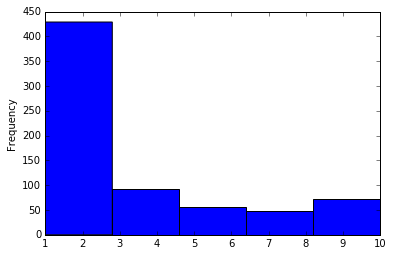

In [159]:
df_in.Uni_Cell_Size.plot.hist(bins=5)


In [160]:
df_in_diff=df_in.groupby('Class').mean()

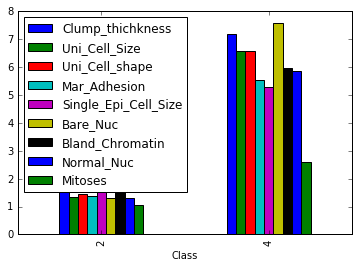

In [161]:
df_in_diff.plot.bar()

In [162]:

Y1=df_in.Class.values
df_in = df_in.drop('Class',1)


In [163]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_in, Y1, test_size=0.25)

In [164]:
y_test.shape

(175,)

In [165]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 1354840 to 160296
Data columns (total 9 columns):
Clump_thichkness        524 non-null int64
Uni_Cell_Size           524 non-null int64
Uni_Cell_shape          524 non-null int64
Mar_Adhesion            524 non-null int64
Single_Epi_Cell_Size    524 non-null int64
Bare_Nuc                524 non-null int64
Bland_Chromatin         524 non-null int64
Normal_Nuc              524 non-null int64
Mitoses                 524 non-null int64
dtypes: int64(9)
memory usage: 40.9 KB


In [166]:
X1_train=X_train.values
X1_test=X_test.values

In [167]:
X1_test

array([[1, 1, 1, ..., 2, 1, 1],
       [1, 1, 1, ..., 3, 1, 1],
       [3, 1, 1, ..., 1, 1, 1],
       ..., 
       [5, 2, 3, ..., 5, 1, 1],
       [4, 1, 1, ..., 3, 1, 1],
       [5, 3, 3, ..., 3, 4, 1]])

In [168]:
# Model 1 logistic regression
model1 = LogisticRegression()
model1 = model1.fit(X1_train, y_train)

# check the accuracy on the training set
model1.score(X1_test, y_test);


In [169]:
model1.score(X1_test, y_test)

0.95999999999999996

In [170]:
model1.score(X1_train, y_train)

0.96946564885496178

In [184]:
pd.DataFrame(zip(df_in.columns,np.transpose(model1.coef_)))

,0,1
0,Clump_thichkness,[0.252831181471]
1,Uni_Cell_Size,[0.156206468217]
2,Uni_Cell_shape,[0.294763101429]
3,Mar_Adhesion,[0.13713118316]
4,Single_Epi_Cell_Size,[-0.177357002549]
5,Bare_Nuc,[0.452893995811]
6,Bland_Chromatin,[0.0869780030401]
7,Normal_Nuc,[0.192769337475]
8,Mitoses,[0.16562371464]


In [183]:
coeff1 = np.transpose(model1.coef_)

TypeError: unbound method scatter() must be called with Axes3D instance as first argument (got ndarray instance instead)

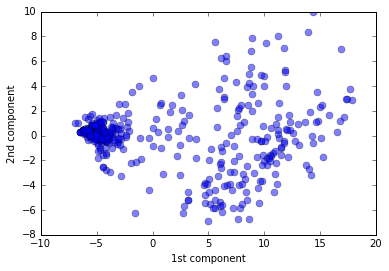

In [201]:

sklearn_pca = sklearnPCA(n_components=3)
sklearn_transf = sklearn_pca.fit_transform(X_train)
plt.plot(sklearn_transf[:,0],sklearn_transf[:,1], 'o', markersize=7, color='blue', alpha=0.5)
plt.xlabel('1st component')
plt.ylabel('2nd component')



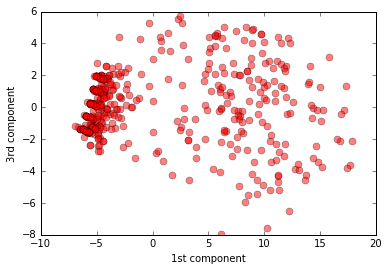

In [202]:
sklearn_transf = sklearn_pca.fit_transform(X_train)
plt.plot(sklearn_transf[:,0],sklearn_transf[:,2], 'o', markersize=7, color='red', alpha=0.5)
plt.xlabel('1st component')
plt.ylabel('3rd component')

In [208]:
df_coeff=pd.DataFrame(zip(df_in.columns, np.transpose(model1.coef_)))
df_coeff

,0,1
0,Clump_thichkness,[0.252831181471]
1,Uni_Cell_Size,[0.156206468217]
2,Uni_Cell_shape,[0.294763101429]
3,Mar_Adhesion,[0.13713118316]
4,Single_Epi_Cell_Size,[-0.177357002549]
5,Bare_Nuc,[0.452893995811]
6,Bland_Chromatin,[0.0869780030401]
7,Normal_Nuc,[0.192769337475]
8,Mitoses,[0.16562371464]


In [209]:
model_SVM = SVC()
model_SVM.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [211]:
model_SVM.score(X_train,y_train)

0.99809160305343514

In [212]:
model_SVM.score(X_test,y_test)

0.95428571428571429

In [220]:
model_SVM.get_params(deep=True)

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [221]:
df_in2=pd.read_csv('/Users/kpoorey/Desktop/Insight/PROJECT/Datasets/data_challenge.csv',header=0,index_col=0)

In [224]:
dfX =  df_in2.drop('Class',1)
dfY = df_in2.Class

In [226]:
X_val = dfX.values

In [227]:
Y_val = dfY.values
